This dataset contains the data of 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. In this notebook, we will explore and visualize data as well as try to predict the acceptance of a personal loan.

In [37]:
# install.packages("dplyr")
# install.packages("corrplot")
# install.packages("ggplot2")
# install.packages("RCurl")
# install.packages("ggpubr")
# install.packages("caret")
# install.packages("tidymodels")
# install.packages("glmnet")
# library(dplyr)
# library(corrplot)
# library(ggplot2)
# library(RCurl)
library(ggpubr)
# library(caret)
# library(tidymodels)
# library(glmnet)

Warning message:
"package 'ggpubr' was built under R version 4.3.2"


In [57]:
data <- read.csv("UniversalBank.csv", header = TRUE, sep = ",")

head(data, 15)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
6,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
7,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
8,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
9,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0


**ID** - customer ID\
**Age** - customer age in years\
**Experience** - professional experience in years\
**Income** - annual income of customer in thousands of \$ \
**ZIP.Code** - customer ZIP code\
**Family** - family size of customer\
**CCAvg** - average monthly credit card spending in thousands of \$ \
**Education** - three categories (1 = undergraduate, 2 = graduate, 3 = advanced)\
**Mortgage** - value of house mortgage (if any) in thousands of \$ \
**Personal.Loan** - Did this customer accept the personal loan offered in the last campaign? (0 = No, 1 = Yes)\
**Securities.Account** - Does the customer have a securities account with the bank? (0 = No, 1 = Yes)\
**CDAccount** -  Does the customer have a certificate of deposit (CD) account with the bank? (0 = No, 1 = Yes)\
**Online** - Does the customer use internet banking facilities? (0 = No, 1 = Yes)\
**CreditCard** - Does the customer uses a credit card issued by the bank? (0 = No, 1 = Yes)


In [58]:
data <- data[, !(names(data) %in% c("ZIP.Code", "ID"))]

head(data, 15)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,25,1,49,4,1.6,1,0,0,1,0,0,0
2,45,19,34,3,1.5,1,0,0,1,0,0,0
3,39,15,11,1,1.0,1,0,0,0,0,0,0
4,35,9,100,1,2.7,2,0,0,0,0,0,0
5,35,8,45,4,1.0,2,0,0,0,0,0,1
6,37,13,29,4,0.4,2,155,0,0,0,1,0
7,53,27,72,2,1.5,2,0,0,0,0,1,0
8,50,24,22,1,0.3,3,0,0,0,0,0,1
9,35,10,81,3,0.6,2,104,0,0,0,1,0


Number of unique values per column:

In [17]:
unique_counts <- summarise_all(data, n_distinct)

for (col_name in names(unique_counts)) {
  cat(sprintf("'%s': %d unique values\n", col_name, unique_counts[[col_name]]))
}

'Age': 45 unique values
'Experience': 47 unique values
'Income': 162 unique values
'Family': 4 unique values
'CCAvg': 108 unique values
'Education': 3 unique values
'Mortgage': 347 unique values
'Personal.Loan': 2 unique values
'Securities.Account': 2 unique values
'CD.Account': 2 unique values
'Online': 2 unique values
'CreditCard': 2 unique values


In [18]:
dimensions <- dim(data)

cat(sprintf("Number of Rows: %d\n", dimensions[1]))
cat(sprintf("Number of Columns: %d\n", dimensions[2]))

Number of Rows: 5000
Number of Columns: 12


In [19]:
null_counts <- colSums(is.na(data))

for (col_name in names(null_counts)) {
  cat(sprintf("'%s': %d null values\n", col_name, null_counts[col_name]))
}

'Age': 0 null values
'Experience': 0 null values
'Income': 0 null values
'Family': 0 null values
'CCAvg': 0 null values
'Education': 0 null values
'Mortgage': 0 null values
'Personal.Loan': 0 null values
'Securities.Account': 0 null values
'CD.Account': 0 null values
'Online': 0 null values
'CreditCard': 0 null values


In [20]:
correlation_matrix <- cor(data)

print(correlation_matrix)

                             Age   Experience       Income      Family
Age                 1.0000000000  0.994214857 -0.055268618 -0.04641766
Experience          0.9942148570  1.000000000 -0.046574178 -0.05256315
Income             -0.0552686182 -0.046574178  1.000000000 -0.15750079
Family             -0.0464176636 -0.052563147 -0.157500785  1.00000000
CCAvg              -0.0520298548 -0.050089085  0.645992592 -0.10928481
Education           0.0413343834  0.013151813 -0.187524257  0.06492891
Mortgage           -0.0125385869 -0.010581552  0.206806228 -0.02044493
Personal.Loan      -0.0077256172 -0.007413098  0.502462292  0.06136704
Securities.Account -0.0004362422 -0.001232134 -0.002616497  0.01999408
CD.Account          0.0080425521  0.010353331  0.169738080  0.01411036
Online              0.0137024021  0.013897900  0.014205919  0.01035404
CreditCard          0.0076810368  0.008967447 -0.002385008  0.01158807
                          CCAvg   Education     Mortgage Personal.Loan
Age   

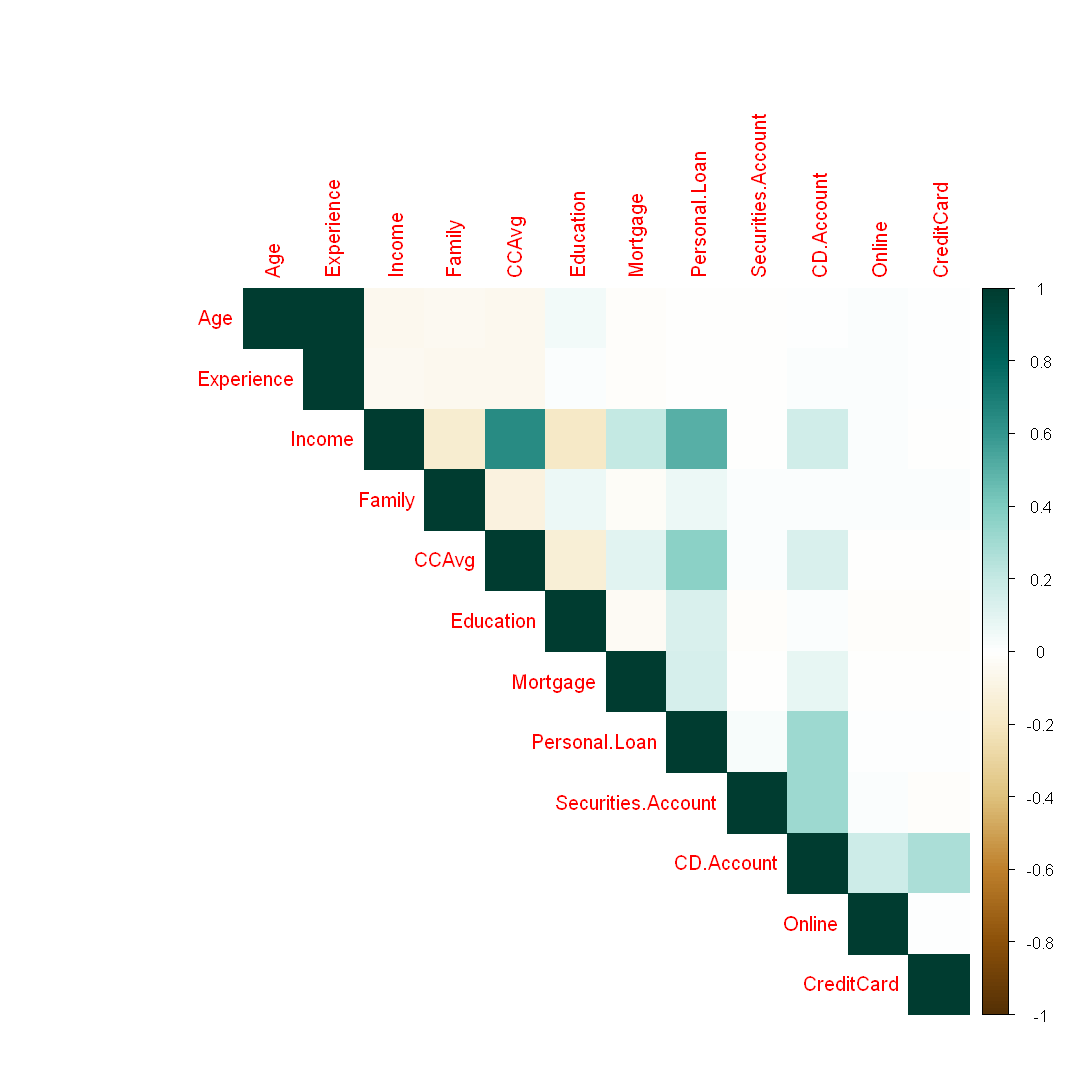

In [21]:
options(repr.plot.width = 9, repr.plot.height = 9)

corrplot(correlation_matrix, method = "color", type = "upper", col = COL2("BrBG"))

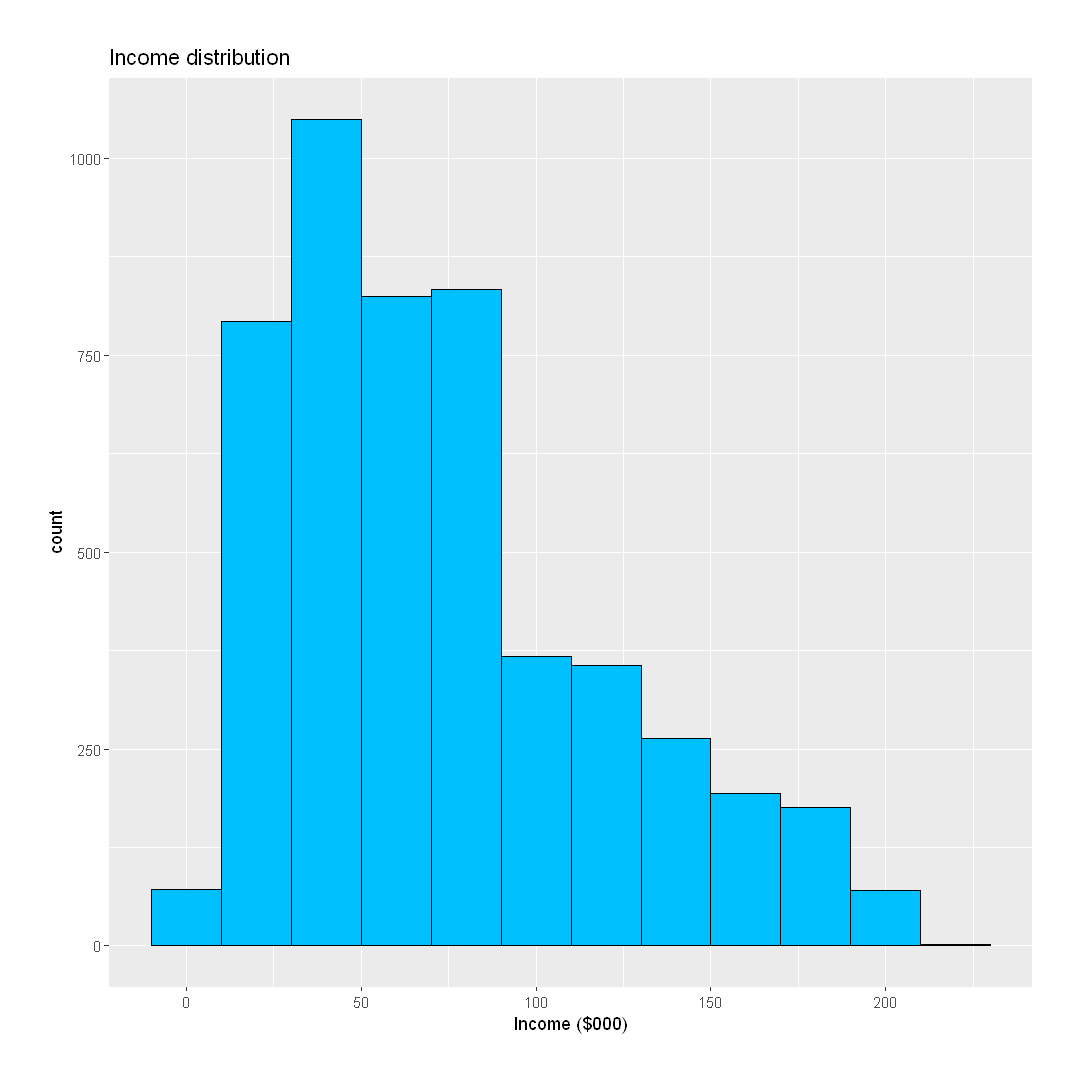

In [22]:
ggplot(data, aes(x = Income)) +
  geom_histogram(binwidth = 20, fill = "deepskyblue", color = "black") +
  labs(title = "Income distribution", x = "Income ($000)") +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

Warning message in geom_bar(binwidth = 20, fill = "deepskyblue", color = "black"):
"Ignoring unknown parameters: `binwidth`"


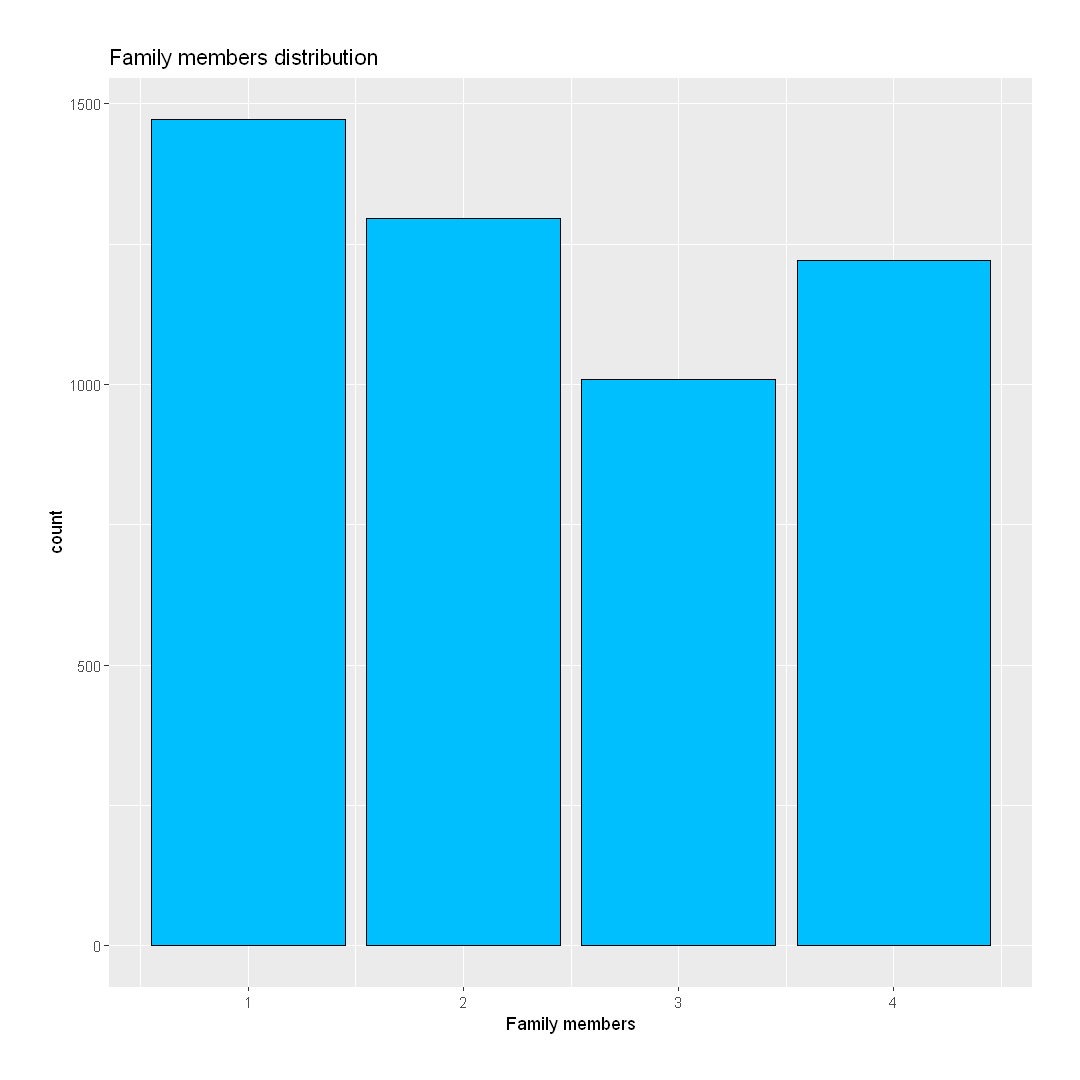

In [23]:
ggplot(data, aes(x = Family)) +
  geom_bar(binwidth = 20, fill = "deepskyblue", color = "black") +
  labs(title = "Family members distribution", x = "Family members") +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

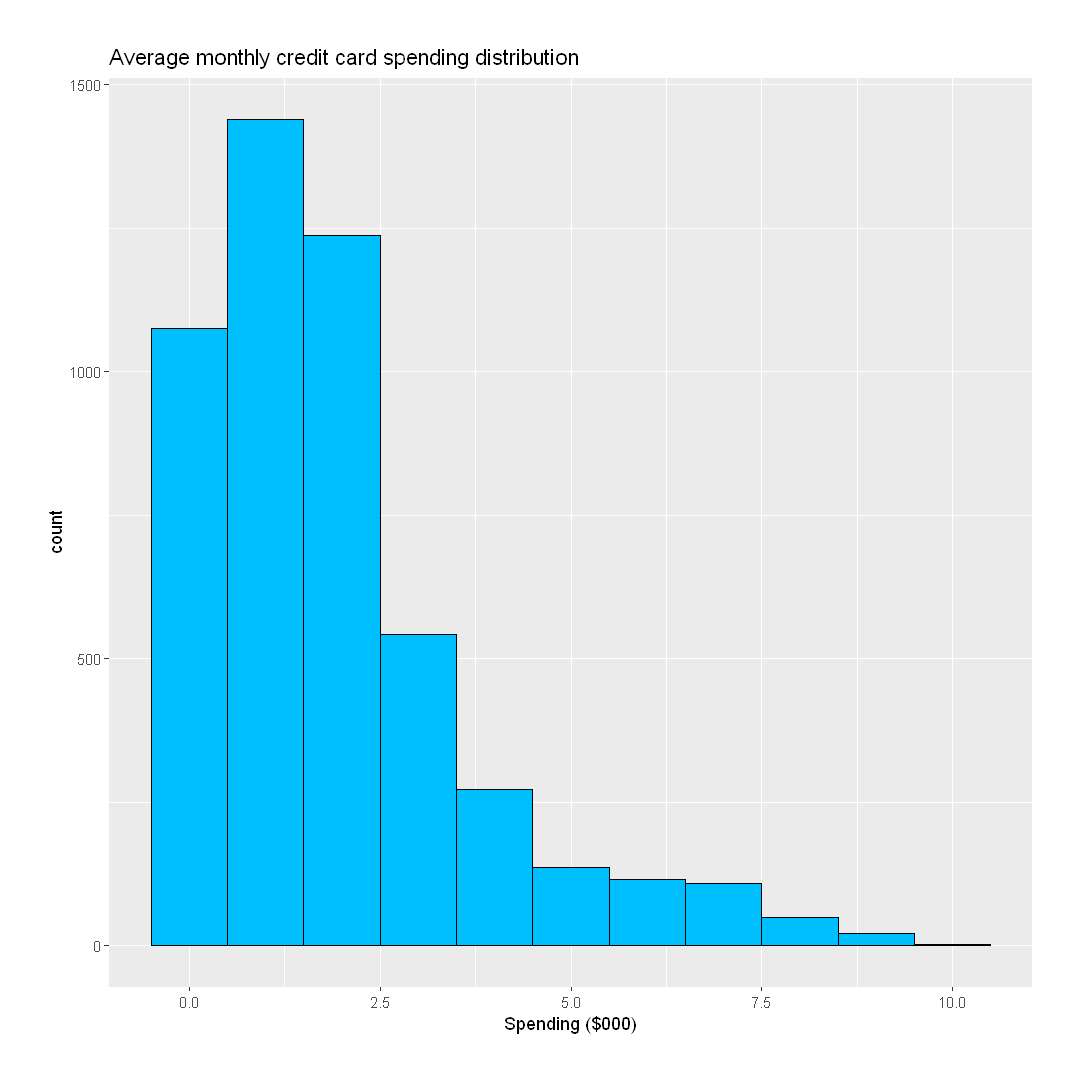

In [24]:
ggplot(data, aes(x = CCAvg)) +
  geom_histogram(binwidth = 1, fill = "deepskyblue", color = "black") +
  labs(title = "Average monthly credit card spending distribution", x = "Spending ($000)") +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

Warning message in geom_bar(binwidth = 20, fill = "deepskyblue", color = "black"):
"Ignoring unknown parameters: `binwidth`"


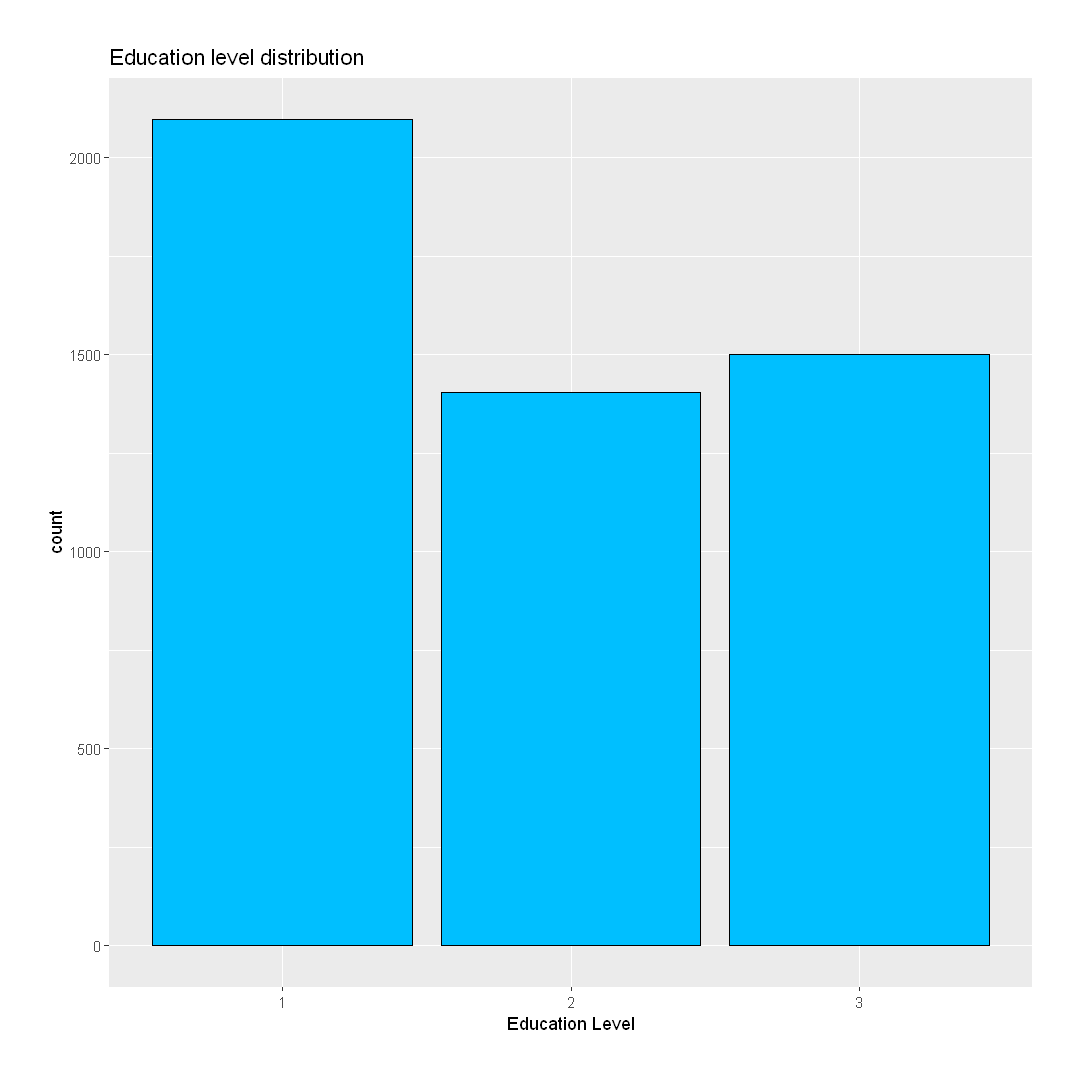

In [25]:
education_labels <- c("undergraduate", "graduate", "advanced")

translated_education <- factor(data$Education, levels = 1:3, labels = education_labels)

ggplot(data, aes(x = factor(Education))) +
  geom_bar(binwidth = 20, fill = "deepskyblue", color = "black") +
  labs(title = "Education level distribution", x = "Education Level") +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

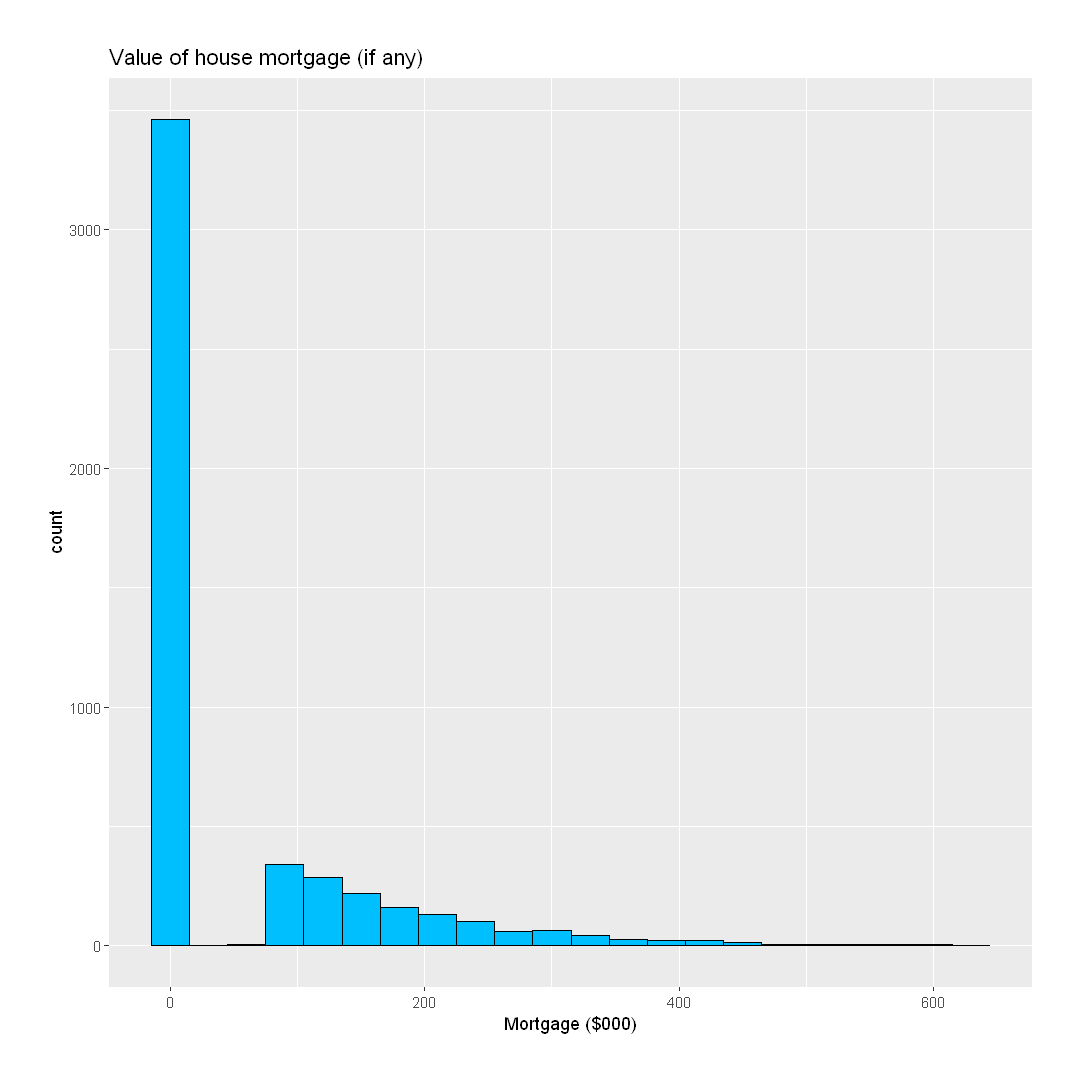

In [26]:
ggplot(data, aes(x = Mortgage)) +
  geom_histogram(binwidth = 30, fill = "deepskyblue", color = "black") +
  labs(title = "Value of house mortgage (if any)", x = "Mortgage ($000)") +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

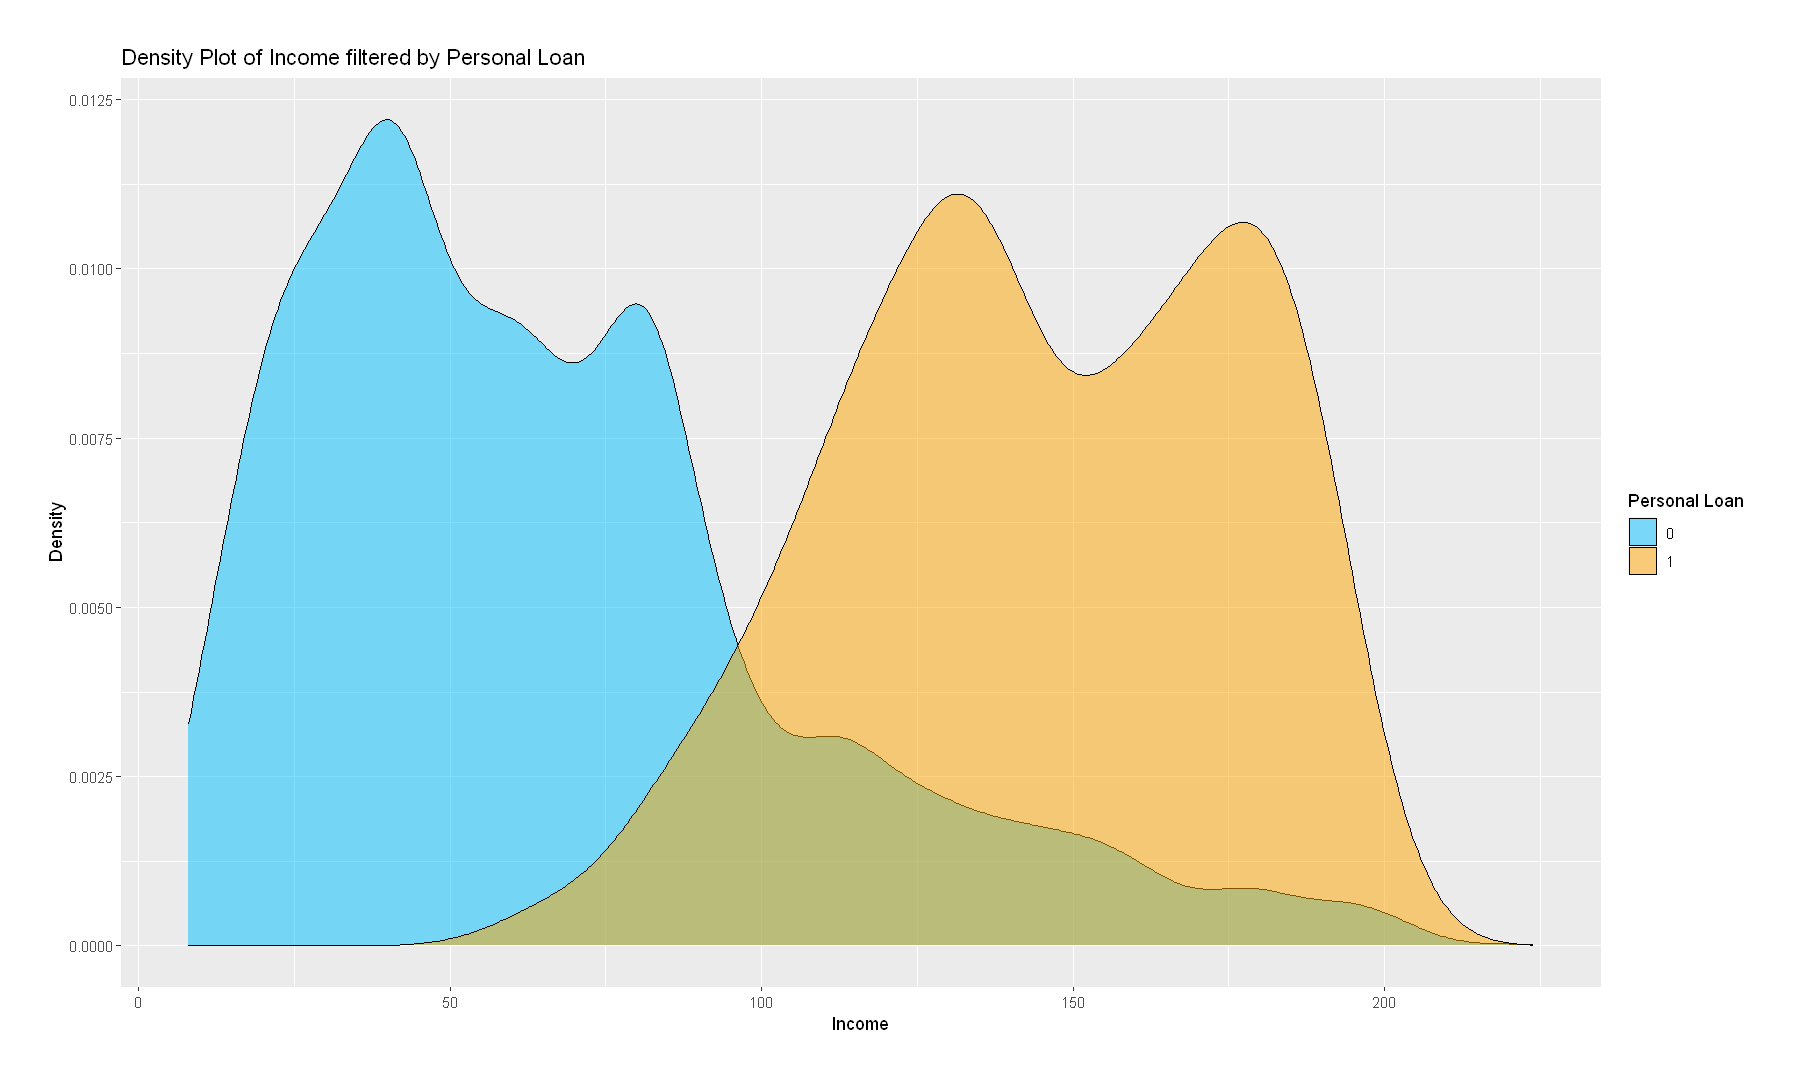

In [27]:
options(repr.plot.width = 15, repr.plot.height = 9)

ggplot(data, aes(x = Income, fill = factor(Personal.Loan))) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of Income filtered by Personal Loan", x = "Income", y = "Density", fill = "Personal Loan") +
  scale_fill_manual(values = c("deepskyblue", "orange")) +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

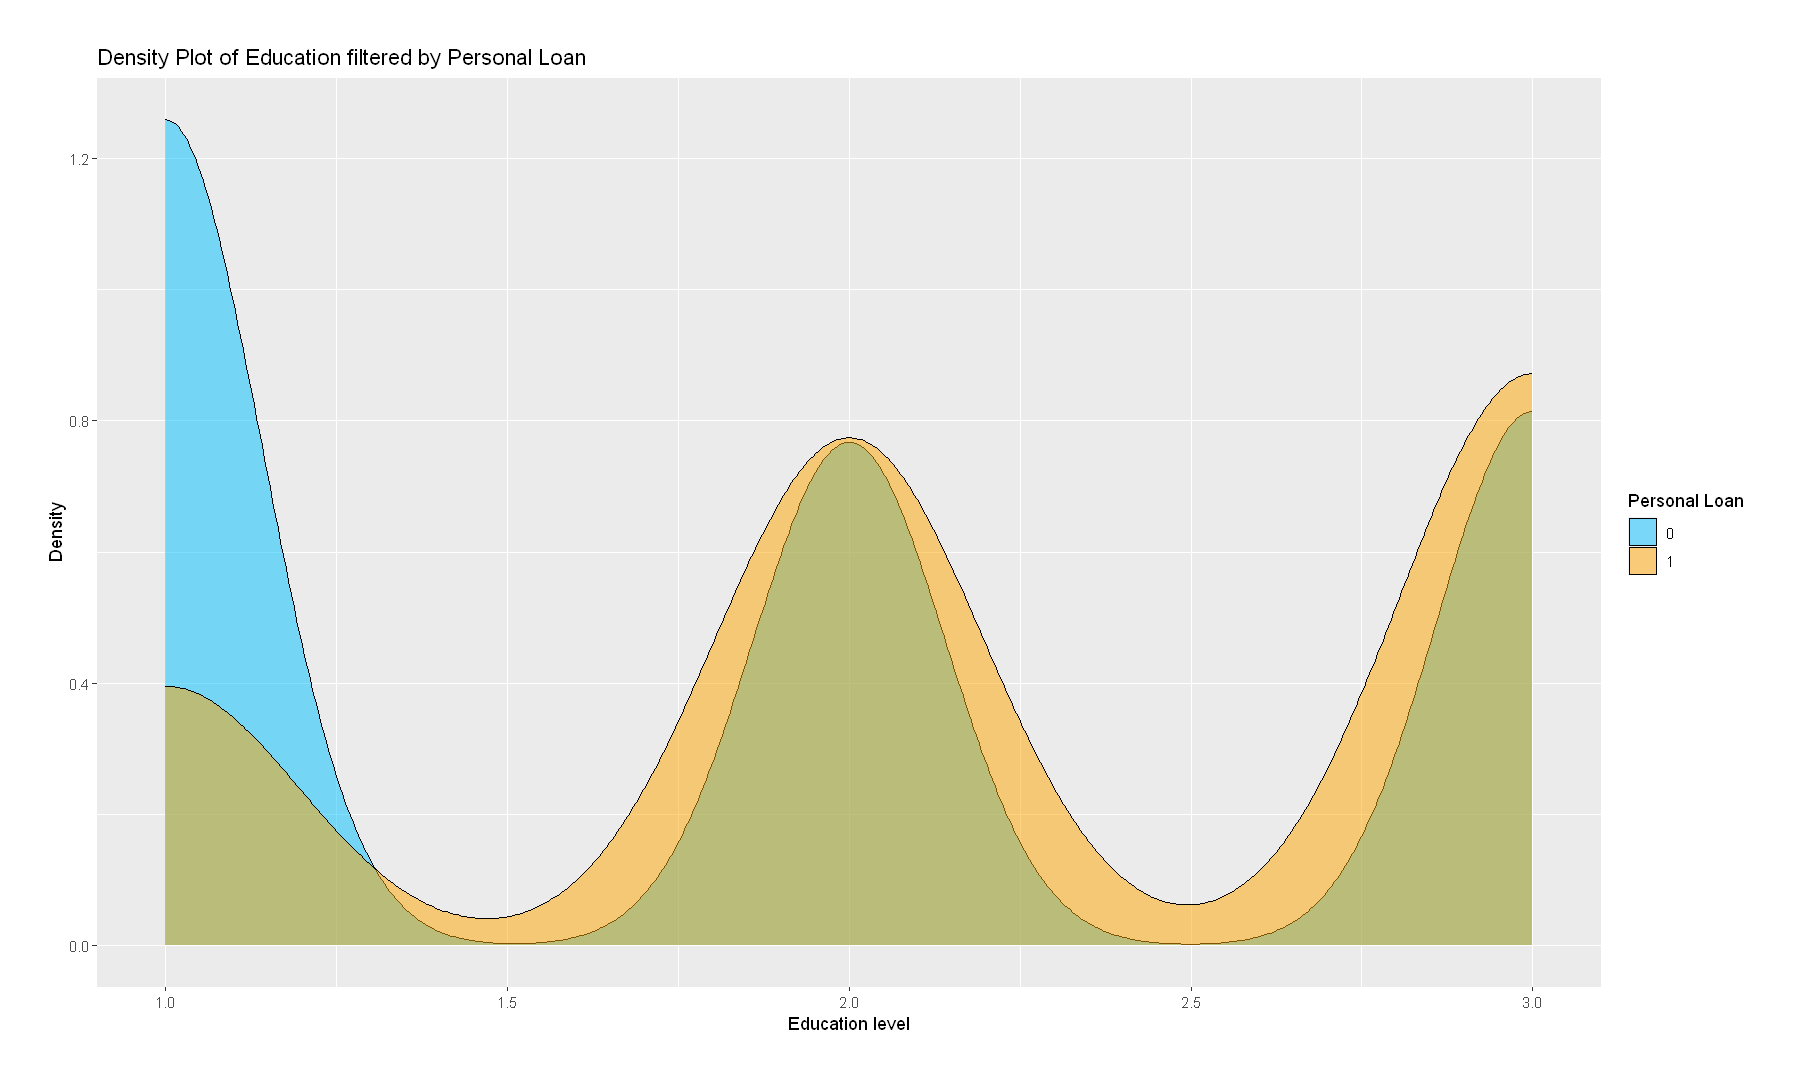

In [28]:
ggplot(data, aes(x = Education, fill = factor(Personal.Loan))) +
  geom_density(alpha = 0.5, position = "identity") +
  labs(title = "Density Plot of Education filtered by Personal Loan", x = "Education level", y = "Density", fill = "Personal Loan") +
  scale_fill_manual(values = c("deepskyblue", "orange")) +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

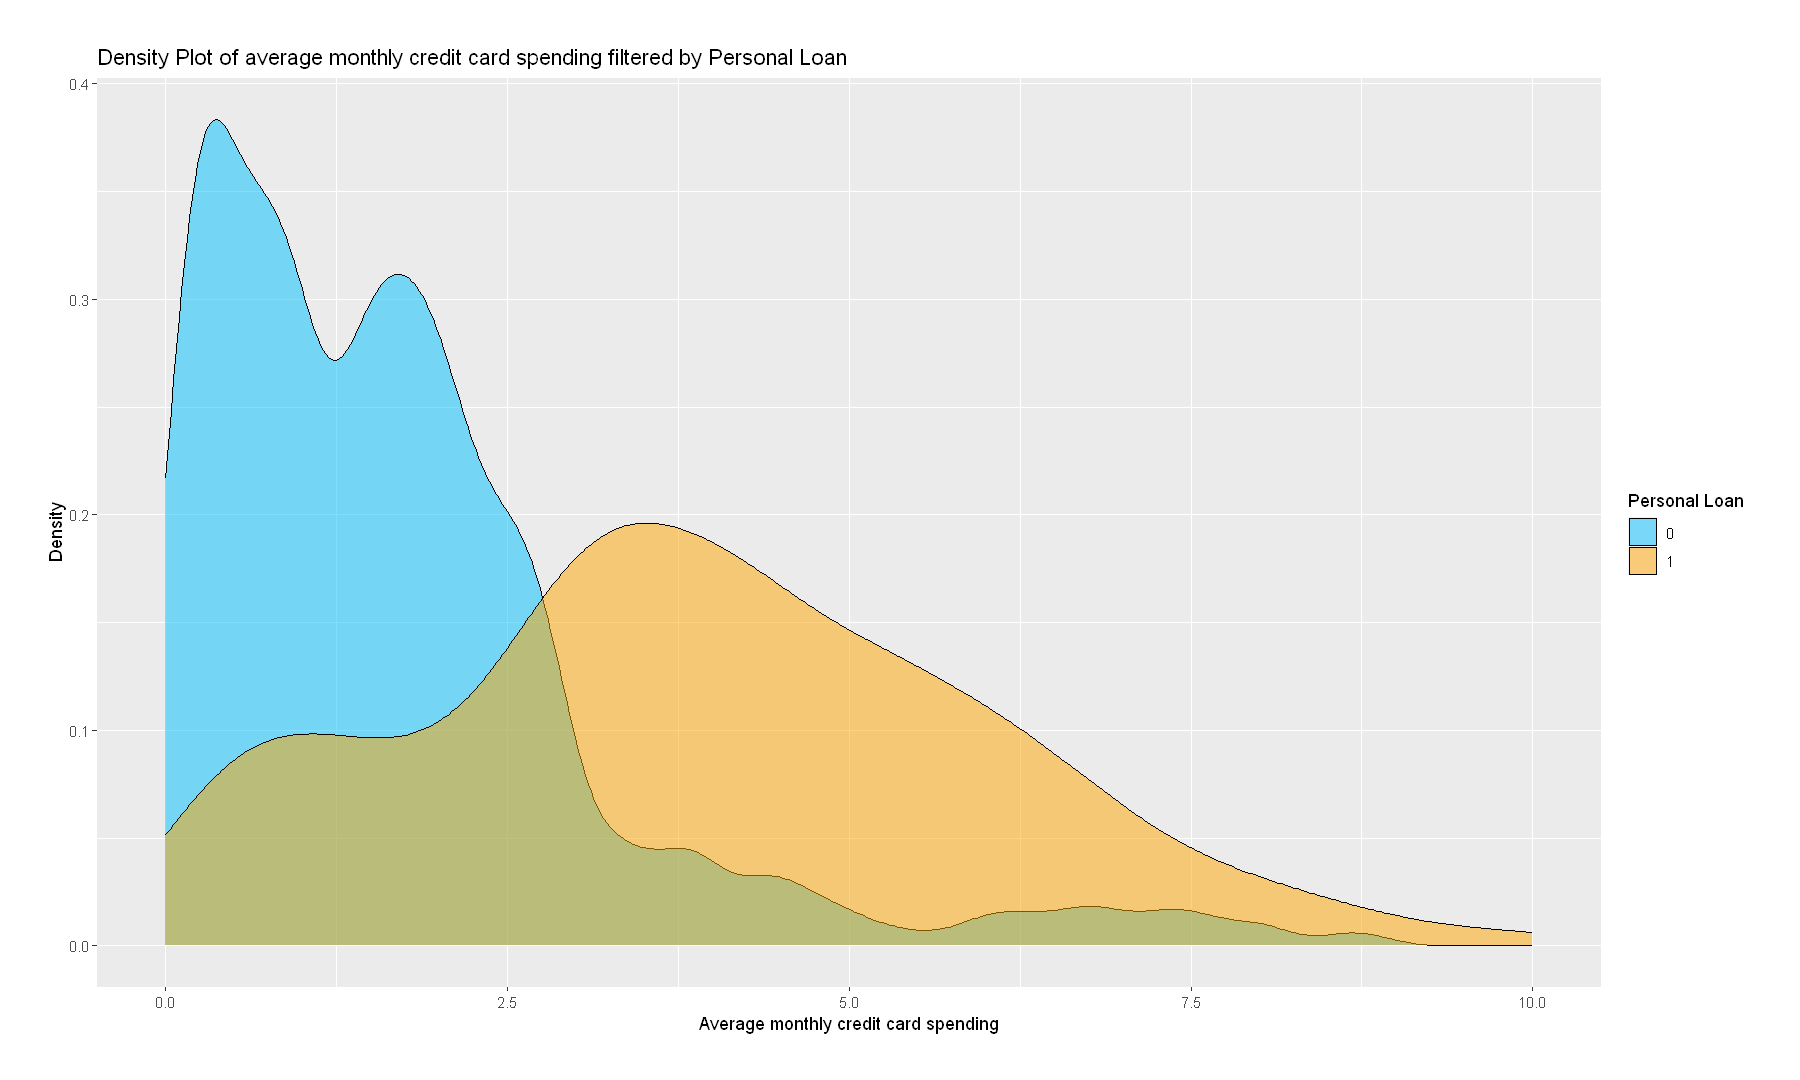

In [29]:
ggplot(data, aes(x = CCAvg, fill = factor(Personal.Loan))) +
  geom_density(alpha = 0.5, position = "identity") +
  labs(title = "Density Plot of average monthly credit card spending filtered by Personal Loan", x = "Average monthly credit card spending", y = "Density", fill = "Personal Loan") +
  scale_fill_manual(values = c("deepskyblue", "orange")) +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

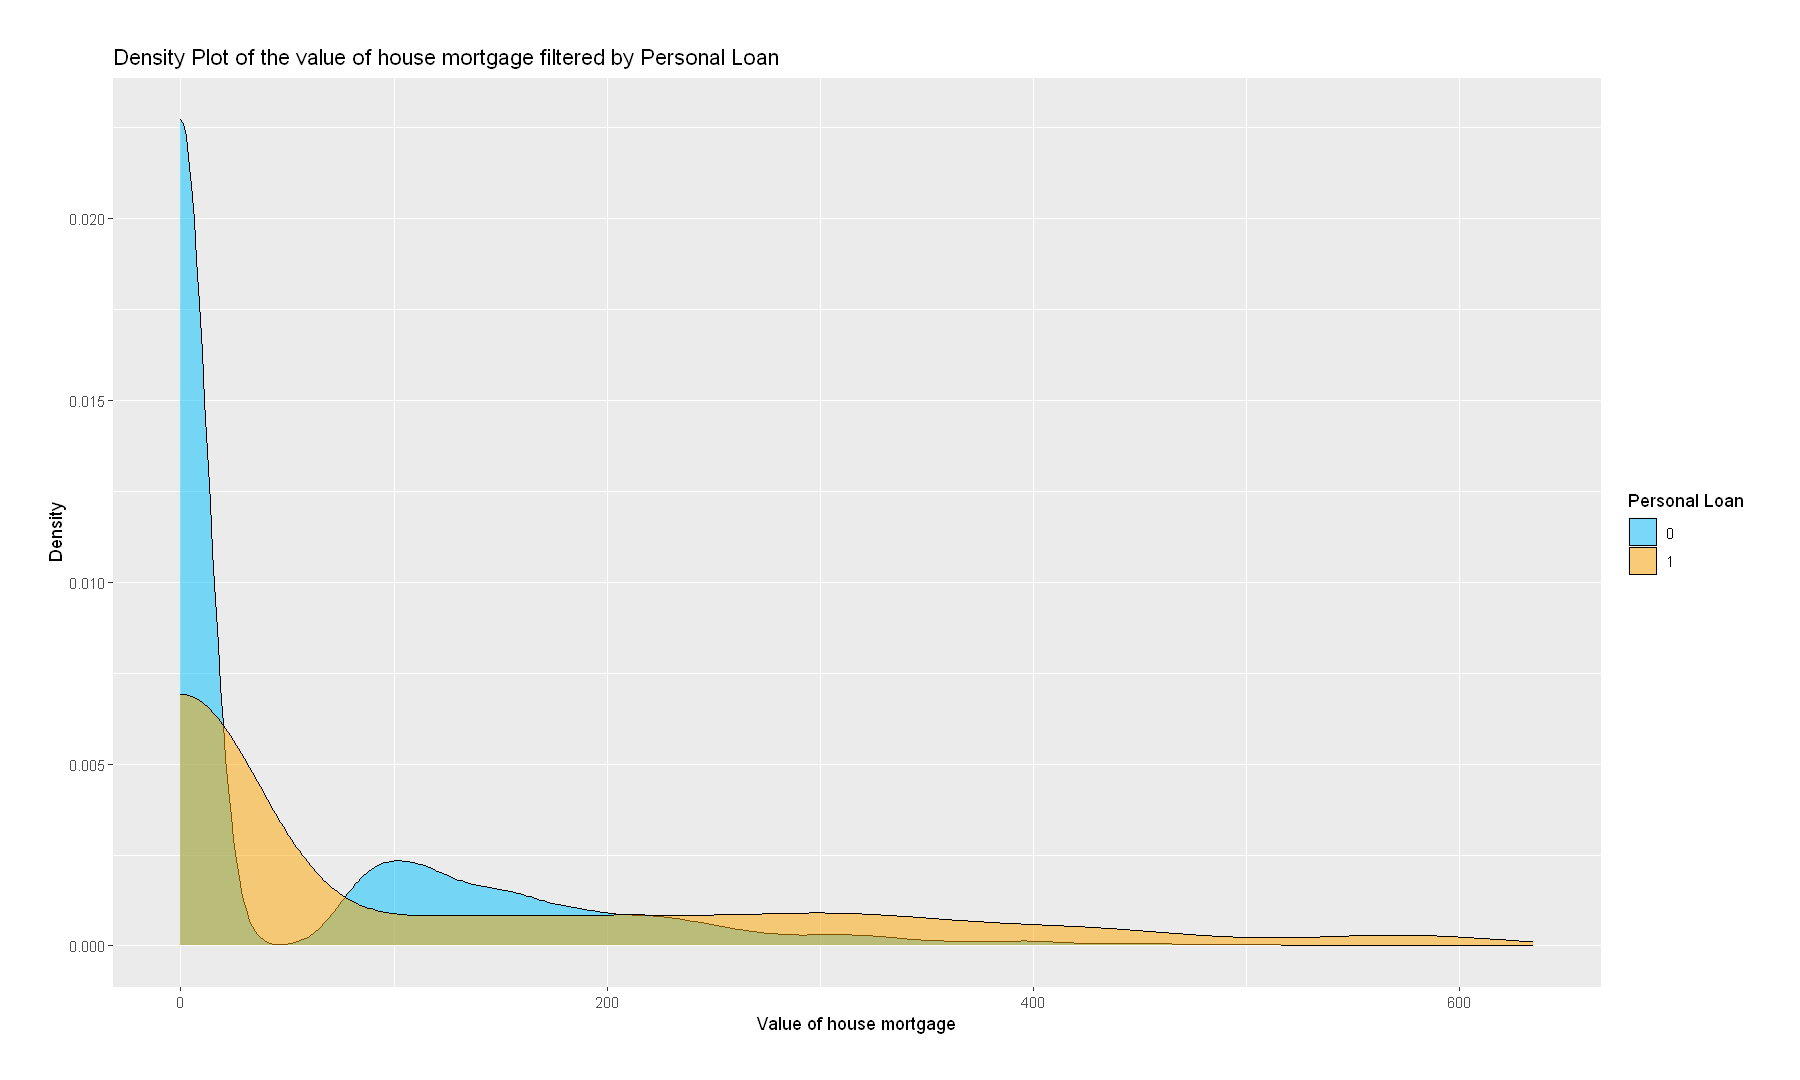

In [30]:
ggplot(data, aes(x = Mortgage, fill = factor(Personal.Loan))) +
  geom_density(alpha = 0.5, position = "identity") +
  labs(title = "Density Plot of the value of house mortgage filtered by Personal Loan", x = "Value of house mortgage", y = "Density", fill = "Personal Loan") +
  scale_fill_manual(values = c("deepskyblue", "orange")) +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

In [31]:
loan_counts <- table(data$Personal.Loan)

print(loan_counts)

result <- loan_counts[["1"]] / (loan_counts[["0"]] + loan_counts[["1"]]) * 100

cat("\nThe loan acceptance rate is", result, "%.")


   0    1 
4520  480 

The loan acceptance rate is 9.6 %.

Now we can see that the data set is unbalanced.

In [32]:
categorical_variables <- sapply(data, function(col) length(unique(col)) <= 5)
print(names(data)[categorical_variables])

[1] "Family"             "Education"          "Personal.Loan"     
[4] "Securities.Account" "CD.Account"         "Online"            
[7] "CreditCard"        


In [33]:
categorical_variables["Personal.Loan"] <- FALSE
print(names(data)[categorical_variables])

[1] "Family"             "Education"          "Securities.Account"
[4] "CD.Account"         "Online"             "CreditCard"        


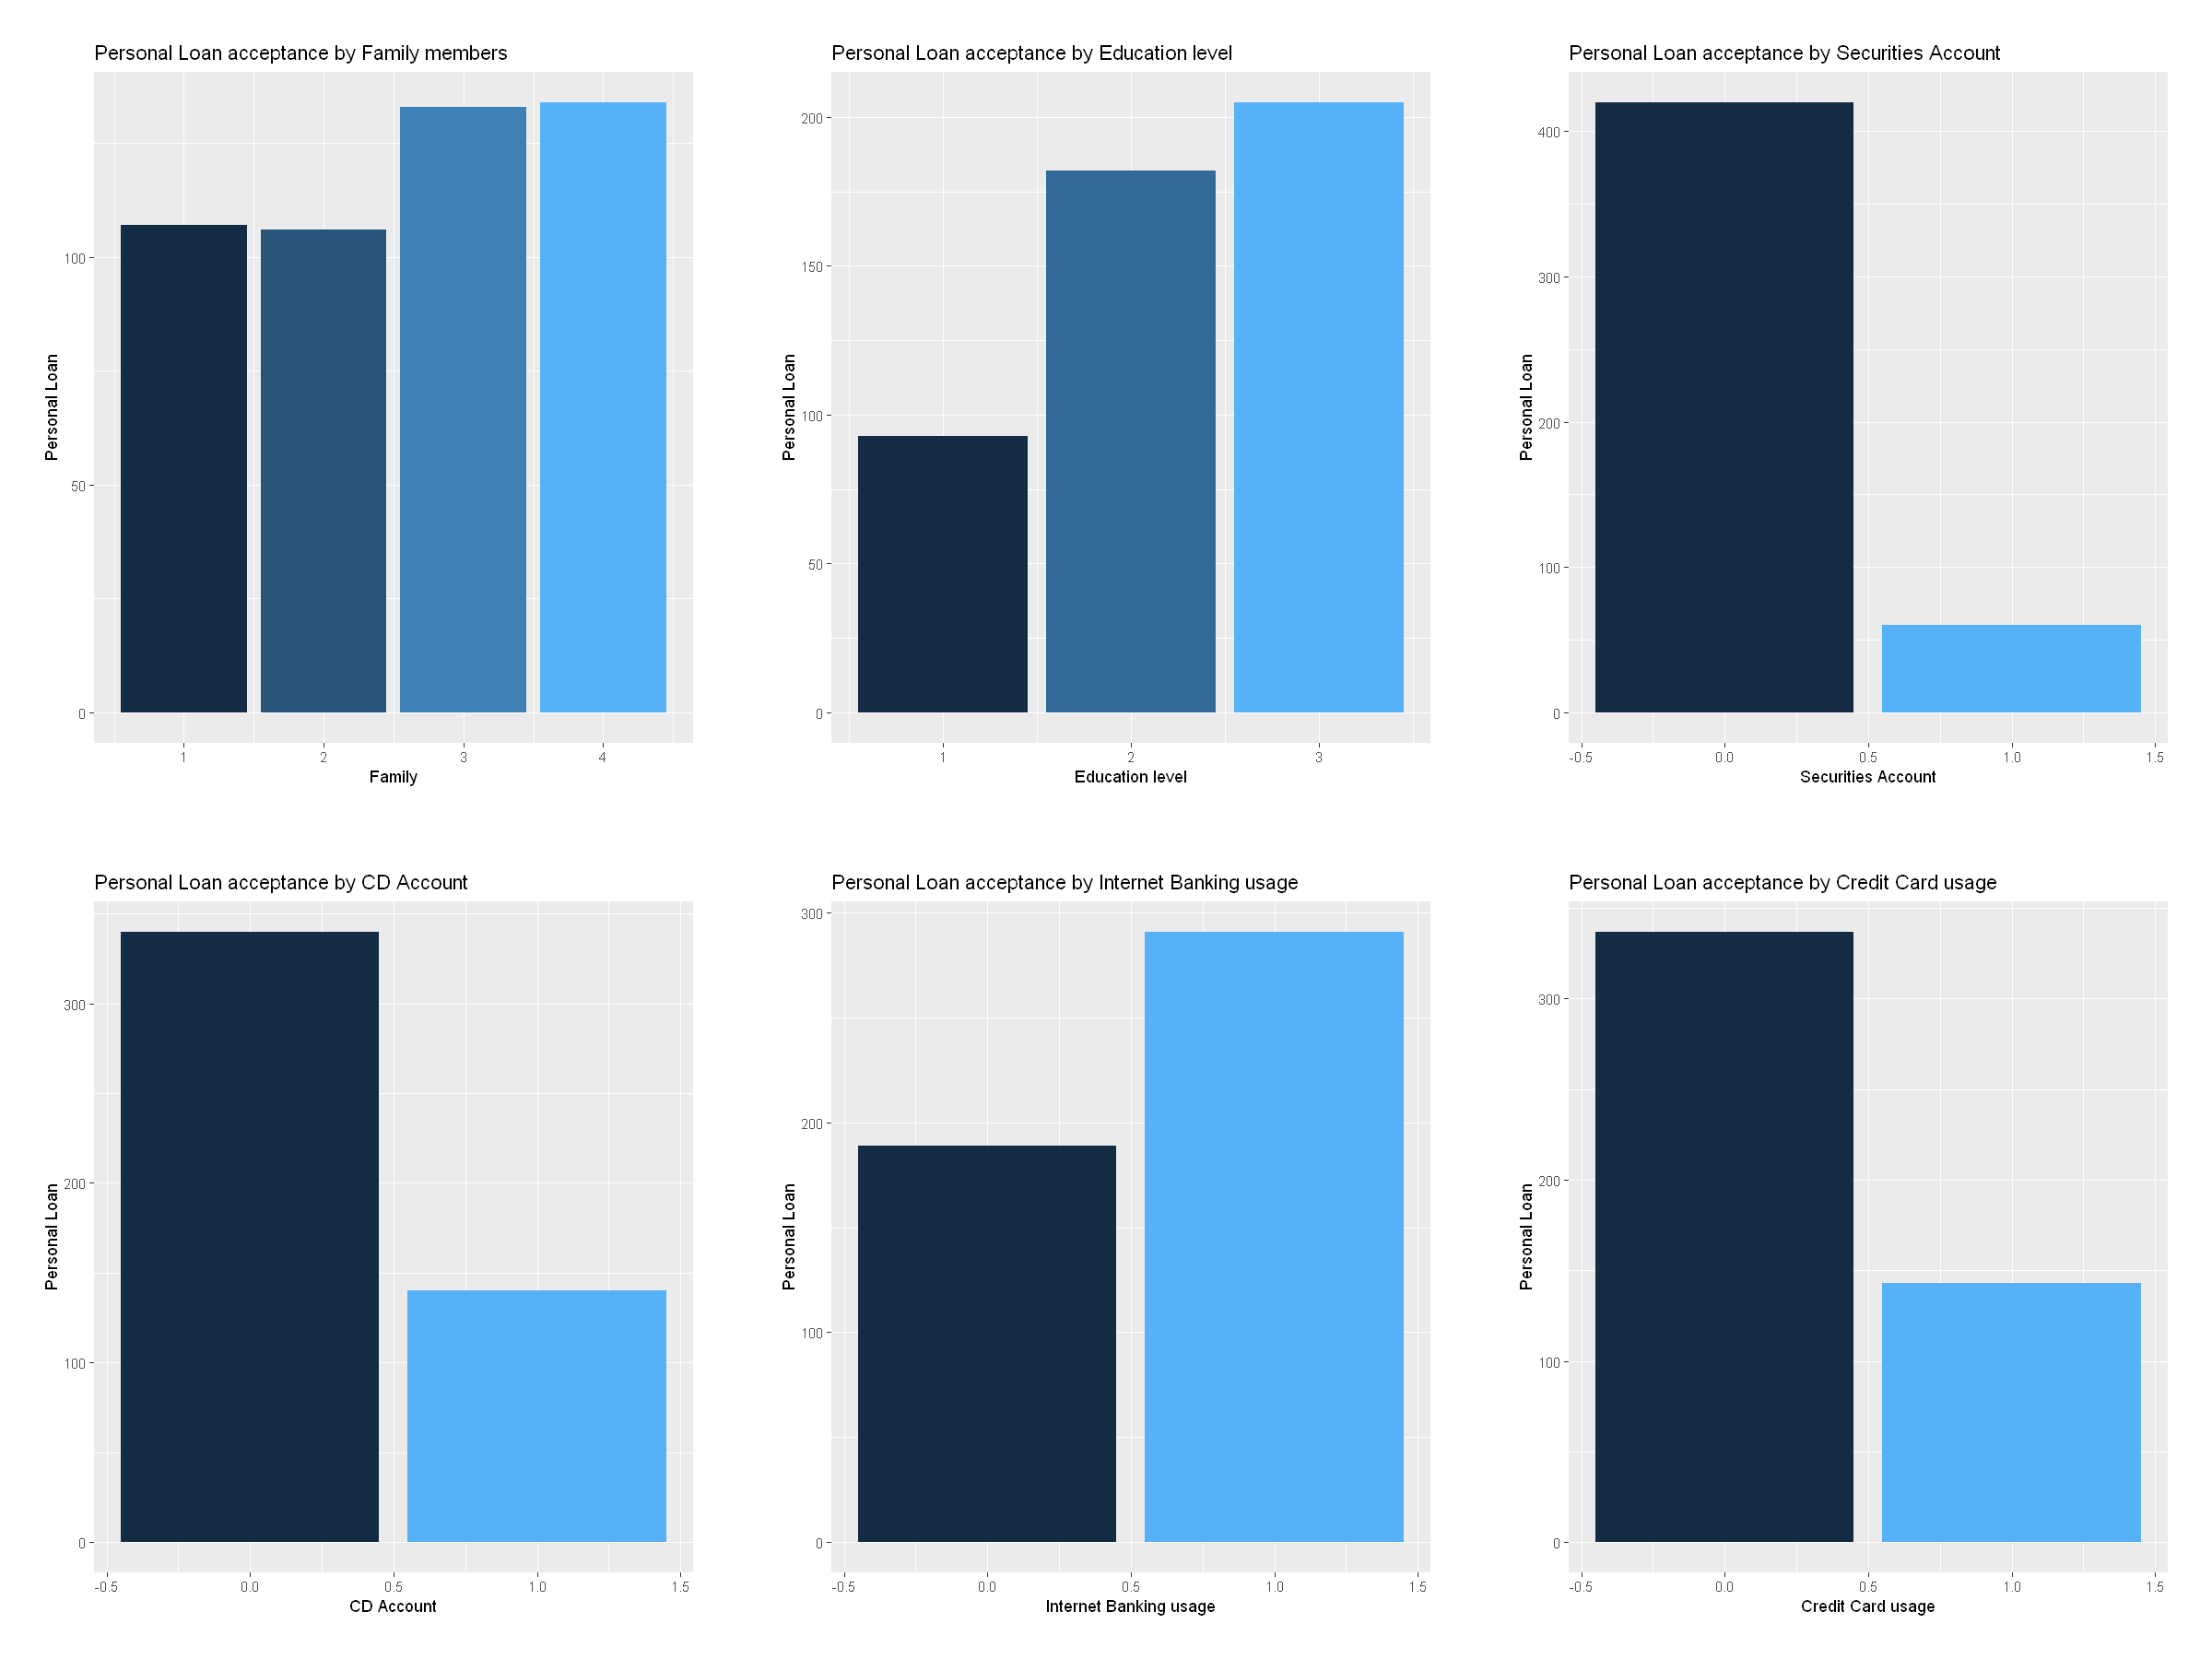

In [39]:
options(repr.plot.width = 20, repr.plot.height = 15)

plt1 <- ggplot(data, aes(x = Family, y = Personal.Loan, fill = Family)) +
  geom_bar(stat = "identity") +
  labs(title = "Personal Loan acceptance by Family members",
       x = "Family", y = "Personal Loan") +
  guides(fill = "none") +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

plt2 <- ggplot(data, aes(x = Education, y = Personal.Loan, fill = Education)) +
  geom_bar(stat = "identity") +
  labs(title = "Personal Loan acceptance by Education level",
       x = "Education level", y = "Personal Loan") +
  guides(fill = "none") +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

plt3 <- ggplot(data, aes(x = Securities.Account, y = Personal.Loan, fill = Securities.Account)) +
  geom_bar(stat = "identity") +
  labs(title = "Personal Loan acceptance by Securities Account",
       x = "Securities Account", y = "Personal Loan") +
  guides(fill = "none") +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

plt4 <- ggplot(data, aes(x = CD.Account, y = Personal.Loan, fill = CD.Account)) +
  geom_bar(stat = "identity") +
  labs(title = "Personal Loan acceptance by CD Account",
       x = "CD Account", y = "Personal Loan") +
  guides(fill = "none") +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

plt5 <- ggplot(data, aes(x = Online, y = Personal.Loan, fill = Online)) +
  geom_bar(stat = "identity") +
  labs(title = "Personal Loan acceptance by Internet Banking usage",
       x = "Internet Banking usage", y = "Personal Loan") +
  guides(fill = "none") +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

plt6 <- ggplot(data, aes(x = CreditCard, y = Personal.Loan, fill = CreditCard)) +
  geom_bar(stat = "identity") +
  labs(title = "Personal Loan acceptance by Credit Card usage",
       x = "Credit Card usage", y = "Personal Loan") +
  guides(fill = "none") +
  theme(plot.margin = margin(1, 1, 1, 1, "cm"))

figure <- ggarrange(plt1, plt2, plt3, plt4, plt5, plt6,
                    ncol = 3, nrow = 2)
figure

In [40]:
data$Fam2 <- as.numeric(data$Family == 2)
data$Fam3 <- as.numeric(data$Family == 3)
data$Fam4 <- as.numeric(data$Family == 4)

In [41]:
data$Educ2 <- as.numeric(data$Education == 2)
data$Educ3 <- as.numeric(data$Education == 3)

In [42]:
data <- data[, !(names(data) %in% c("Education", "Family"))]

In [43]:
data

Age,Experience,Income,CCAvg,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard,Fam2,Fam3,Fam4,Educ2,Educ3
<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,1,49,1.6,0,0,1,0,0,0,0,0,1,0,0
45,19,34,1.5,0,0,1,0,0,0,0,1,0,0,0
39,15,11,1.0,0,0,0,0,0,0,0,0,0,0,0
35,9,100,2.7,0,0,0,0,0,0,0,0,0,1,0
35,8,45,1.0,0,0,0,0,0,1,0,0,1,1,0
37,13,29,0.4,155,0,0,0,1,0,0,0,1,1,0
53,27,72,1.5,0,0,0,0,1,0,1,0,0,1,0
50,24,22,0.3,0,0,0,0,0,1,0,0,0,0,1
35,10,81,0.6,104,0,0,0,1,0,0,1,0,1,0


In [44]:
set.seed(5)

split <- initial_split(data, prop = 0.6, strata = data$Personal.Loan)

train_data <- split %>%
         training()
test_data <- split %>%
        testing()

In [45]:
train_data$Personal.Loan = as.factor(train_data$Personal.Loan)

In [46]:
model <- logistic_reg(mixture = double(1), penalty = double(1)) %>%
  set_engine("glmnet") %>%
  set_mode("classification") %>%
  fit(Personal.Loan ~ ., data = train_data)

tidy(model)

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),-7.0950096357,0
Age,-0.0019707653,0
Experience,0.0005306482,0
Income,0.0309520461,0
CCAvg,0.1966572993,0
Mortgage,0.0008126014,0
Securities.Account,-0.3508237511,0
CD.Account,2.0724632142,0
Online,-0.2485666412,0


In [47]:
logistic_model <- glm(Personal.Loan ~ ., data = train_data, family = binomial)

summary(logistic_model)


Call:
glm(formula = Personal.Loan ~ ., family = binomial, data = train_data)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.086e+01  2.552e+00  -4.255 2.09e-05 ***
Age                -1.185e-01  9.491e-02  -1.248 0.212017    
Experience          1.179e-01  9.434e-02   1.250 0.211472    
Income              6.657e-02  4.348e-03  15.311  < 2e-16 ***
CCAvg               2.368e-01  6.275e-02   3.774 0.000161 ***
Mortgage            6.570e-04  8.475e-04   0.775 0.438227    
Securities.Account -6.198e-01  3.989e-01  -1.554 0.120216    
CD.Account          3.228e+00  4.737e-01   6.815 9.41e-12 ***
Online             -5.658e-01  2.241e-01  -2.525 0.011573 *  
CreditCard         -9.609e-01  2.982e-01  -3.223 0.001271 ** 
Fam2               -3.186e-01  3.153e-01  -1.011 0.312220    
Fam3                2.112e+00  3.350e-01   6.305 2.88e-10 ***
Fam4                1.688e+00  3.236e-01   5.217 1.82e-07 ***
Educ2               4.280e+00  3.958e-0

**We can see that, with the significance level of 5 %, the statistically significant predictor variables are income, average monthly credit card spending, having a certificate of deposit (CD) account, use of internet banking facilities, use of a credit card issued by the bank, family size and education level.**

In [48]:
predictions <- predict(logistic_model, newdata = test_data, type = "response")

predicted_labels <- ifelse(predictions > 0.5, 1, 0)

conf_matrix <- table(Actual = test_data$Personal.Loan, Predicted = predicted_labels)

conf_matrix

      Predicted
Actual    0    1
     0 1786   22
     1   66  127

In [49]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

precision <- conf_matrix[2, 2] / sum(conf_matrix[, 2])

recall <- conf_matrix[2, 2] / sum(conf_matrix[2, ])

f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy:", accuracy * 100, "%\n")
cat("Precision:", precision * 100, "%\n")
cat("Recall:", recall * 100, "%\n")
cat("F1 Score:", f1_score * 100, "%\n")

Accuracy: 95.6022 %


Precision: 85.2349 %
Recall: 65.80311 %
F1 Score: 74.26901 %


In [60]:
new_data <- data[, !(names(data) %in% c("Age", "Experience", "Mortgage", "Securities.Account", "Fam2"))]

In [61]:
set.seed(5)

split <- initial_split(new_data, prop = 0.6, strata = new_data$Personal.Loan)

train_data <- split %>% 
         training()
test_data <- split %>%
        testing()

In [62]:
train_data$Personal.Loan = as.factor(train_data$Personal.Loan)

In [63]:
model <- logistic_reg(mixture = double(1), penalty = double(1)) %>%
  set_engine("glmnet") %>%
  set_mode("classification") %>%
  fit(Personal.Loan ~ ., data = train_data)

tidy(model)

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),-8.48219576,0
Income,0.03086415,0
Family,0.36931971,0
CCAvg,0.17541370,0
Education,0.91014098,0
CD.Account,2.37023004,0
Online,-0.28046778,0
CreditCard,-0.58745542,0


In [65]:
logistic_model <- glm(Personal.Loan ~ ., data = train_data, family = binomial)

summary(logistic_model)


Call:
glm(formula = Personal.Loan ~ ., family = binomial, data = train_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -13.553636   0.743622 -18.227  < 2e-16 ***
Income        0.055166   0.003368  16.379  < 2e-16 ***
Family        0.704320   0.098814   7.128 1.02e-12 ***
CCAvg         0.123276   0.050190   2.456  0.01404 *  
Education     1.709038   0.147161  11.613  < 2e-16 ***
CD.Account    3.710794   0.372078   9.973  < 2e-16 ***
Online       -0.588229   0.205284  -2.865  0.00416 ** 
CreditCard   -1.261437   0.276255  -4.566 4.97e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1869.78  on 2997  degrees of freedom
Residual deviance:  750.48  on 2990  degrees of freedom
AIC: 766.48

Number of Fisher Scoring iterations: 8


In [66]:
predictions <- predict(logistic_model, newdata = test_data, type = "response")

predicted_labels <- ifelse(predictions > 0.5, 1, 0)

conf_matrix <- table(Actual = test_data$Personal.Loan, Predicted = predicted_labels)

conf_matrix

      Predicted
Actual    0    1
     0 1786   18
     1   81  117

In [67]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

precision <- conf_matrix[2, 2] / sum(conf_matrix[, 2])

recall <- conf_matrix[2, 2] / sum(conf_matrix[2, ])

f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy:", accuracy * 100, "%\n")
cat("Precision:", precision * 100, "%\n")
cat("Recall:", recall * 100, "%\n")
cat("F1 Score:", f1_score * 100, "%\n")

Accuracy: 95.05495 %
Precision: 86.66667 %
Recall: 59.09091 %


F1 Score: 70.27027 %
